In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
df=pd.read_csv('train.csv')
df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [3]:
df_copy=df

# EDA

In [4]:
df.shape

(137, 43)

In [5]:
#checking the dataset containing any redundant features
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [7]:
df.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')

In [8]:
# seperate the variables accoriding to their datatypes of both object and integer

obj=[]
num=[]
for i in df.select_dtypes(include='object'):
    obj.append(i)
print(obj)

    
for j in df.select_dtypes(include='number'):
    num.append(j)
print(num)
   

print(len(obj))

print(len(num))
        

['Open Date', 'City', 'City Group', 'Type']
['Id', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue']
4
39


in this dataset ,which having 4 catagorical and 39 neumerical(including target='revenue') features

In [9]:
df.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


#### EDA with categorical data

<BarContainer object of 137 artists>

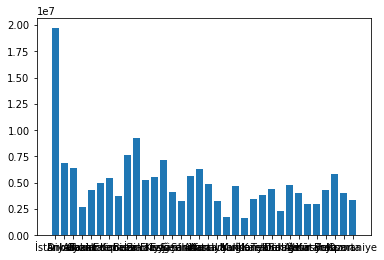

In [10]:
plt.bar(df['City'],df['revenue'])

In [11]:
df['City'].value_counts()

İstanbul          50
Ankara            19
İzmir              9
Bursa              5
Samsun             5
Sakarya            4
Antalya            4
Tekirdağ           3
Kayseri            3
Eskişehir          3
Adana              3
Diyarbakır         3
Aydın              2
Konya              2
Trabzon            2
Muğla              2
Şanlıurfa          1
Kırklareli         1
Edirne             1
Bolu               1
Isparta            1
Amasya             1
Balıkesir          1
Tokat              1
Afyonkarahisar     1
Uşak               1
Kocaeli            1
Kastamonu          1
Elazığ             1
Osmaniye           1
Denizli            1
Gaziantep          1
Kütahya            1
Karabük            1
Name: City, dtype: int64

In [12]:
#unique values in 'City'
len(df['City'].value_counts())

34

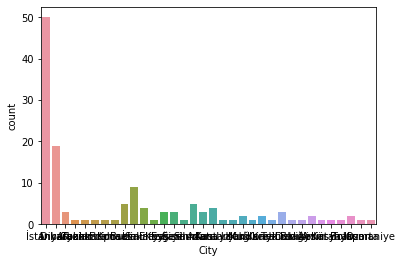

In [13]:
sns.countplot(df['City'])

<BarContainer object of 137 artists>

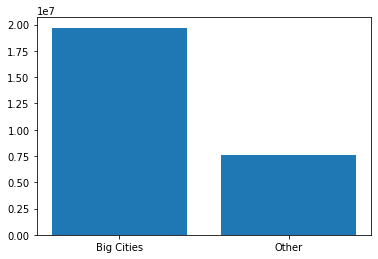

In [14]:
plt.bar('City Group','revenue',data=df)

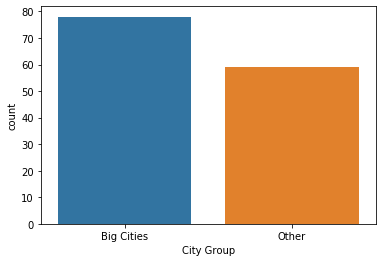

In [15]:
sns.countplot('City Group',data=df)

In [16]:
df[['City Group','revenue']]

,City Group,revenue
0,Big Cities,5653753.0
1,Big Cities,6923131.0
2,Other,2055379.0
3,Other,2675511.0
4,Other,4316715.0
...,...,...
132,Other,5787594.0
133,Big Cities,9262754.0
134,Other,2544857.0
135,Big Cities,7217634.0


In the case of City Group,which consist of two categories Big Cities and Other.Size wise which means,the count of Big City is slightly larger than Other

But in case of revenue, 'Big City' contribute much more impact on revenue than 'Other'

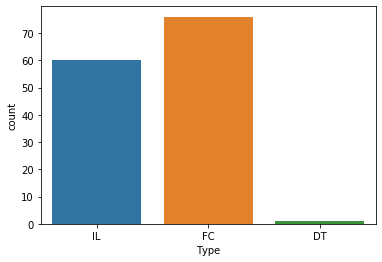

In [17]:
sns.countplot(df['Type'])

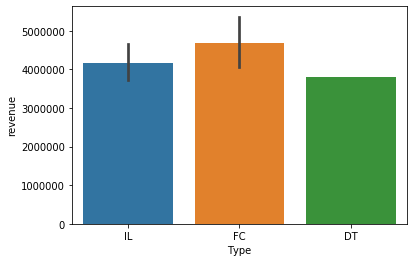

In [18]:
sns.barplot('Type','revenue',data=df)

#### EDA on neumerical data 

In [19]:
df.select_dtypes(include='number')

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,4,5.0,4.0,4.0,2,2,5,4,5,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,4,5.0,4.0,4.0,1,2,5,5,5,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,2,4.0,2.0,5.0,2,3,5,5,5,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,6,4.5,6.0,6.0,4,4,10,8,10,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,3,4.0,3.0,4.0,2,2,5,5,5,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,2,3.0,3.0,5.0,4,2,4,4,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,4,5.0,4.0,4.0,2,3,5,4,4,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,3,4.0,4.0,4.0,2,3,5,5,5,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,4,5.0,4.0,5.0,2,2,5,5,5,...,3.0,0,0,0,0,0,0,0,0,7217634.0


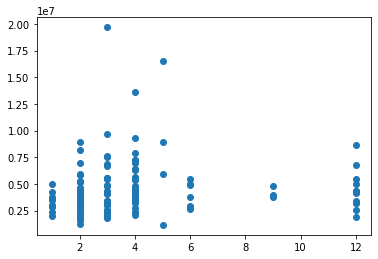

In [20]:
plt.scatter(df['P1'],df['revenue'])

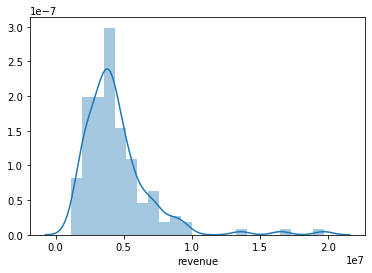

In [21]:
sns.distplot(df['revenue'])

Here our target data 'revenue' is right skewed,so we need to normalize

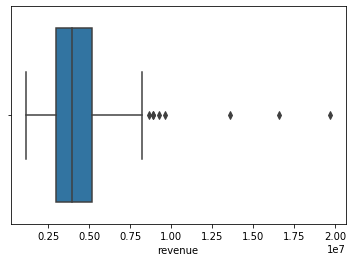

In [22]:
sns.boxplot('revenue', data=df)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is

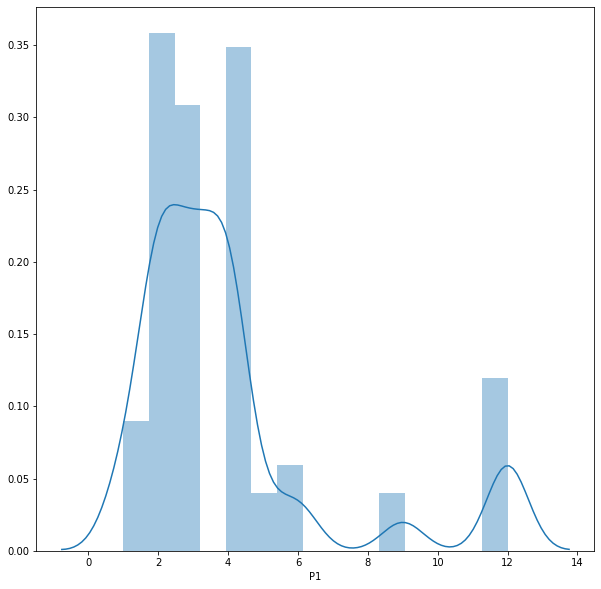

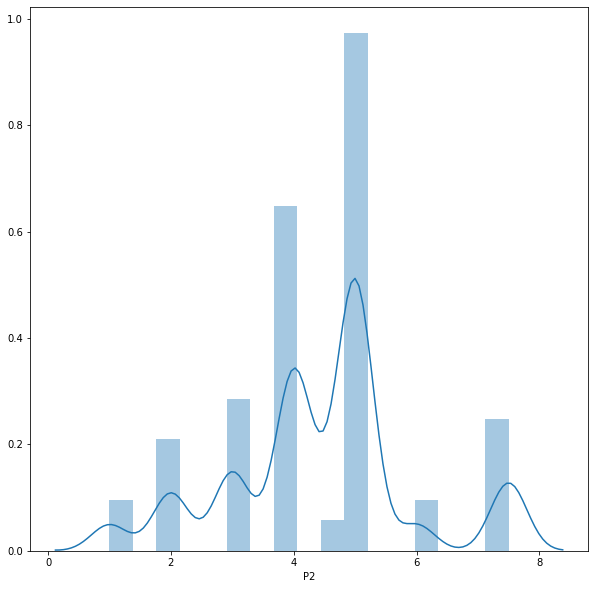

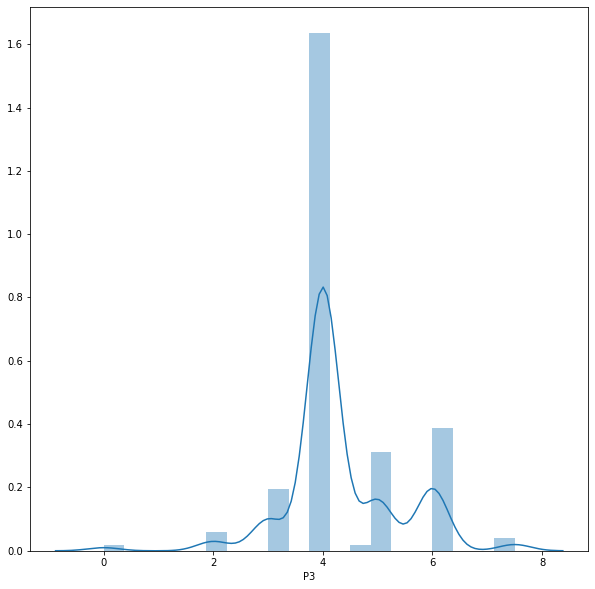

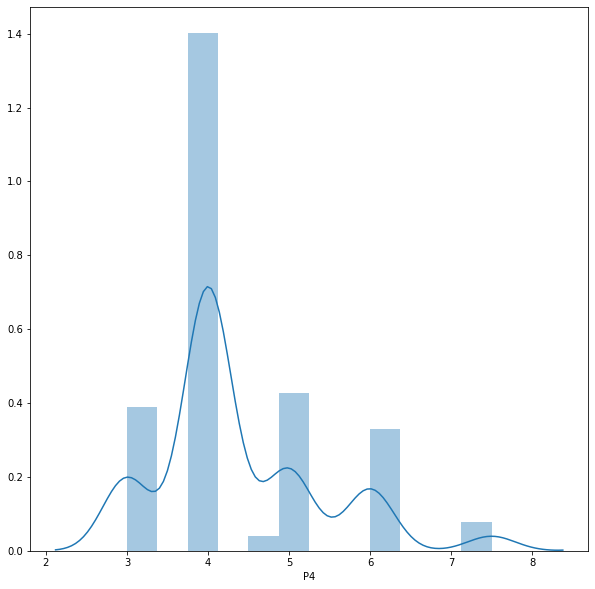

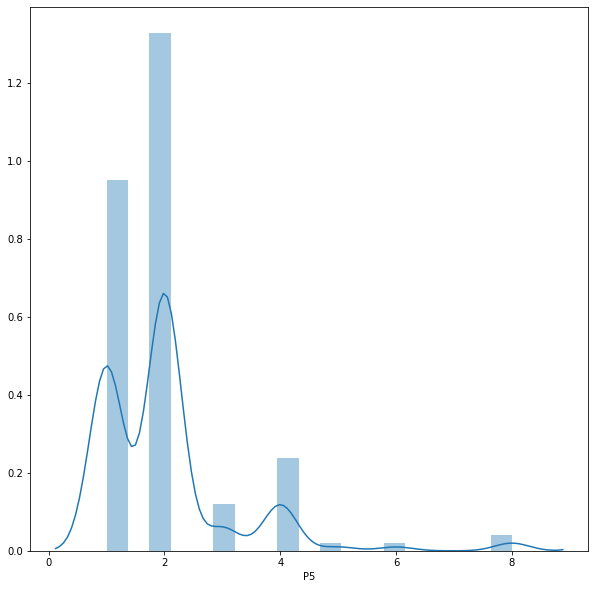

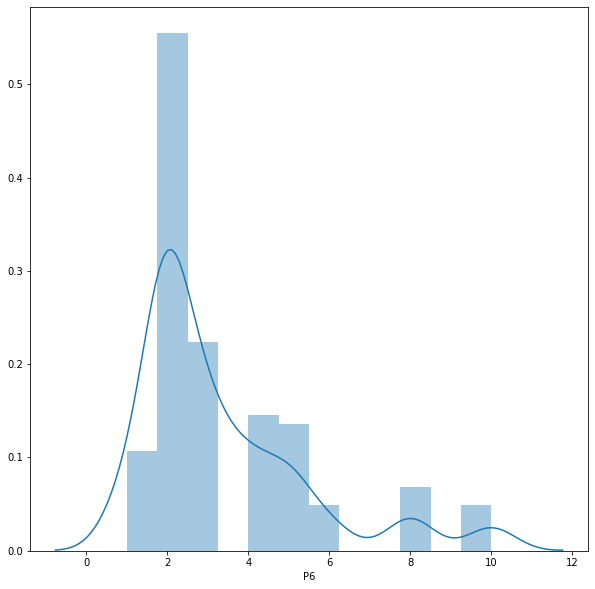

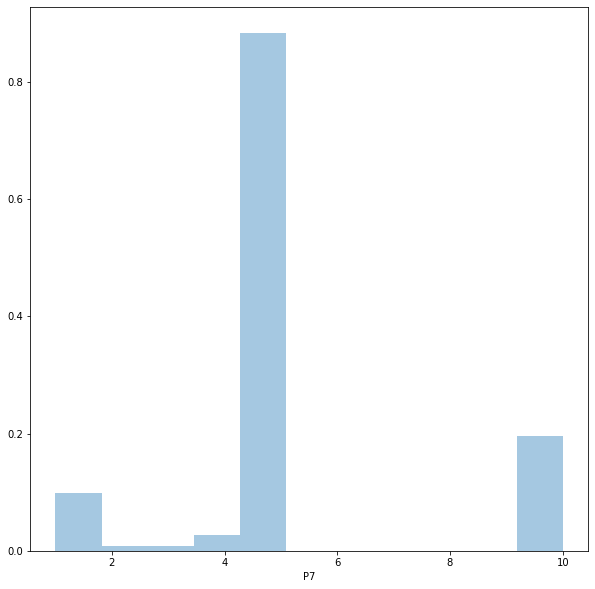

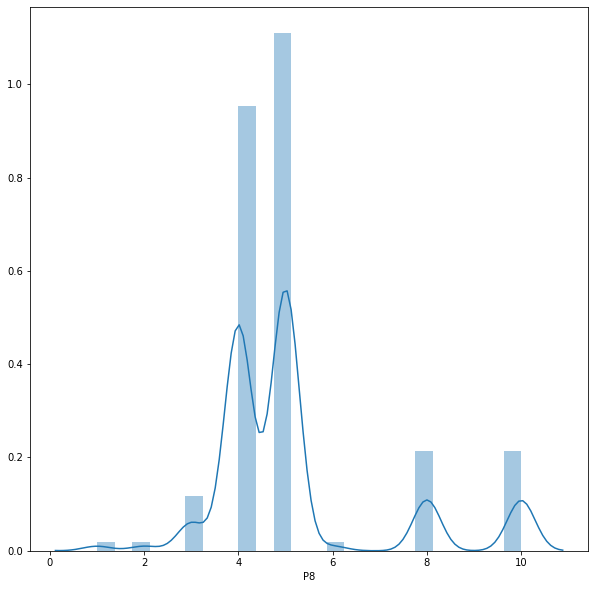

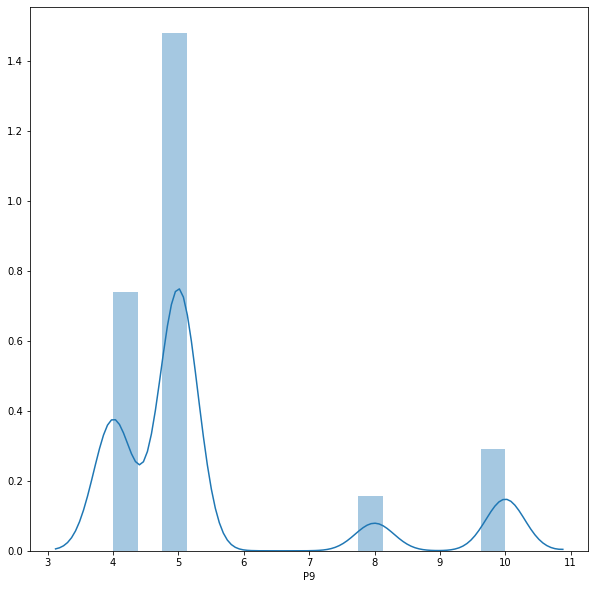

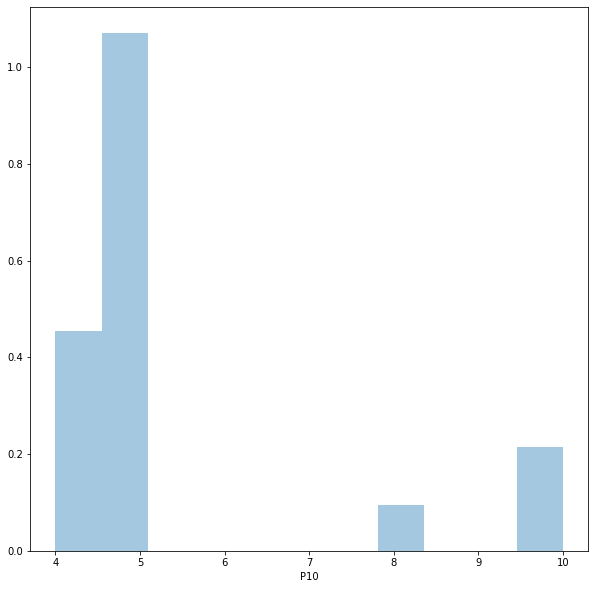

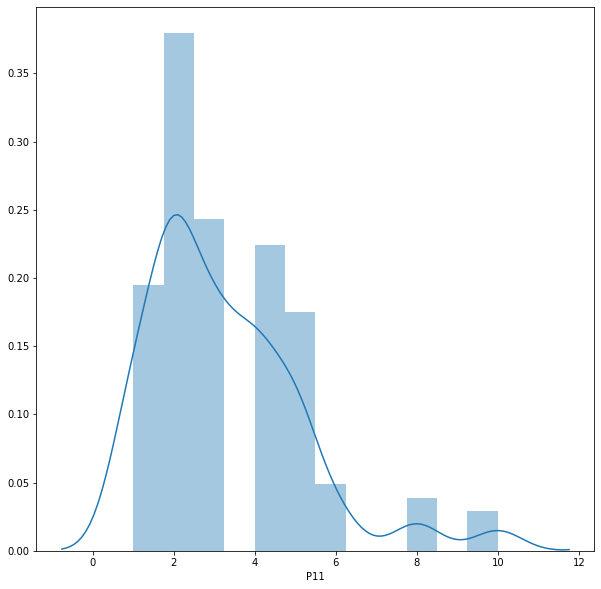

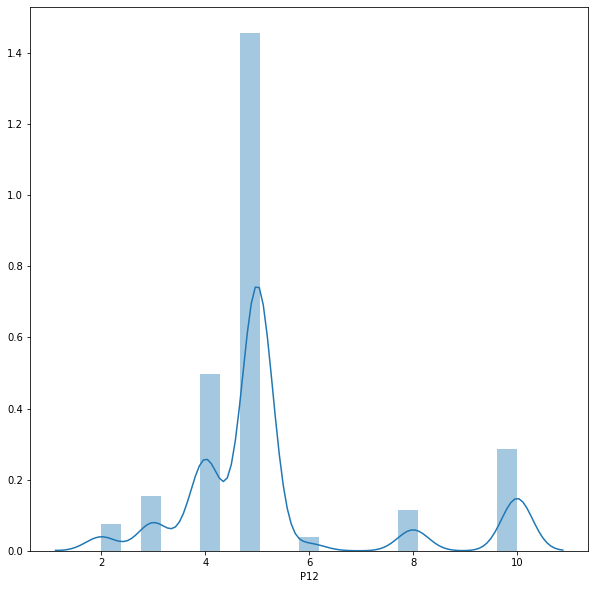

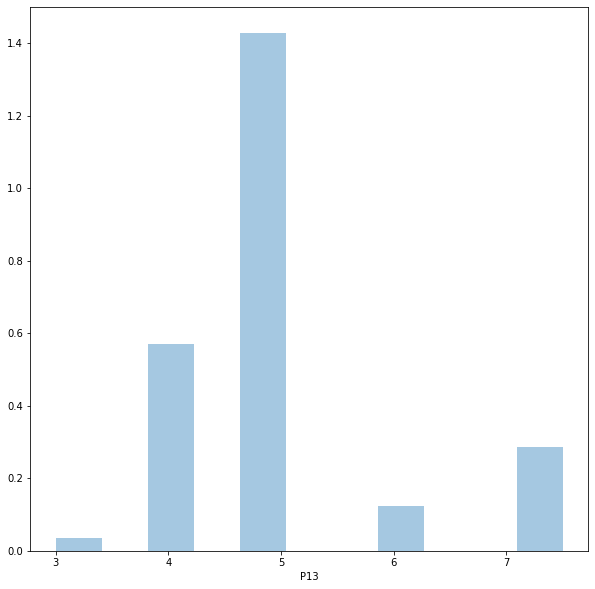

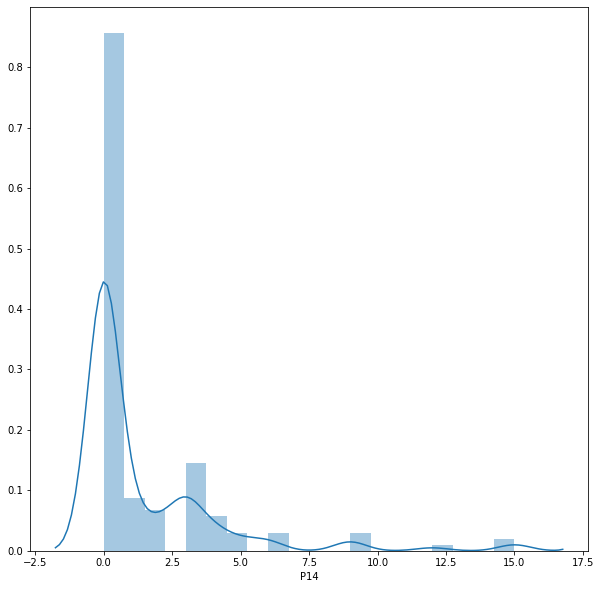

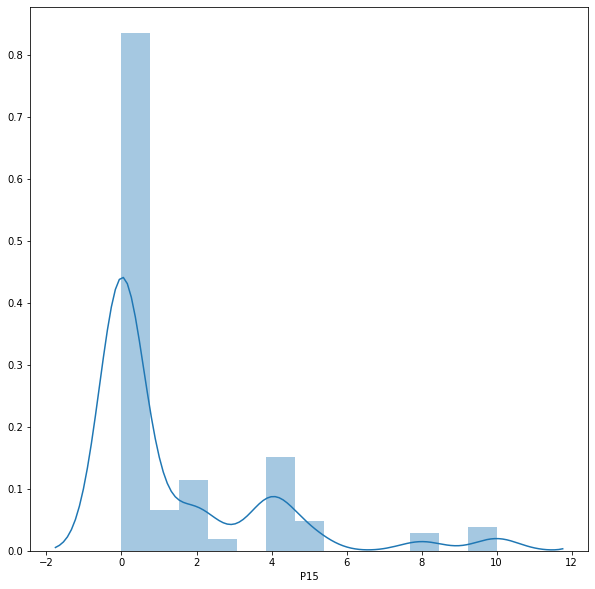

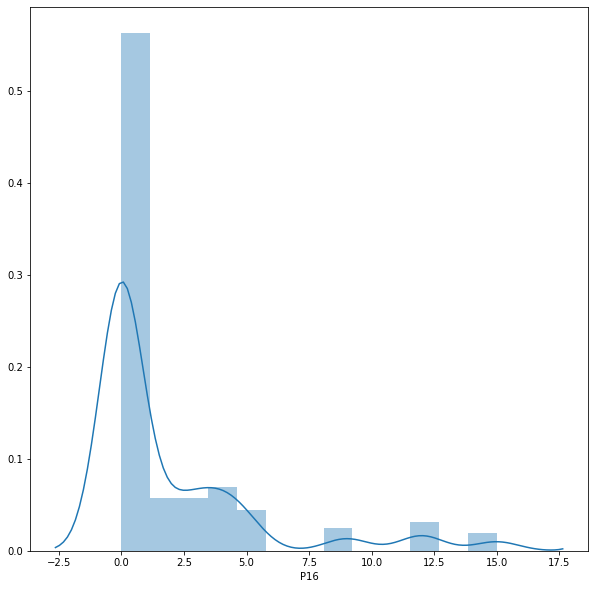

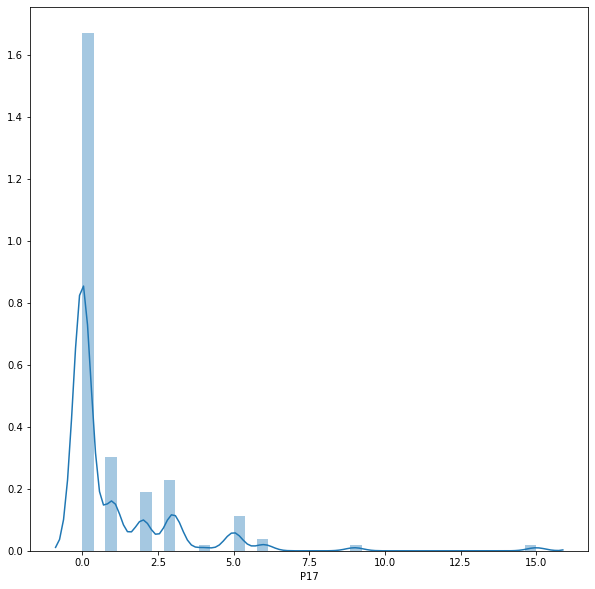

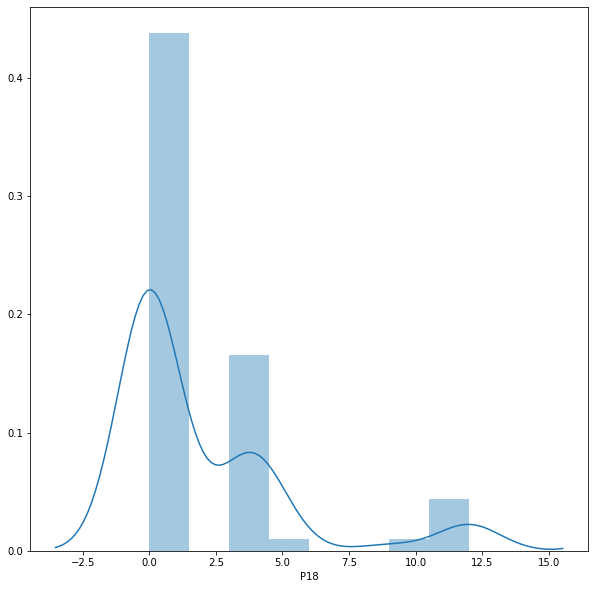

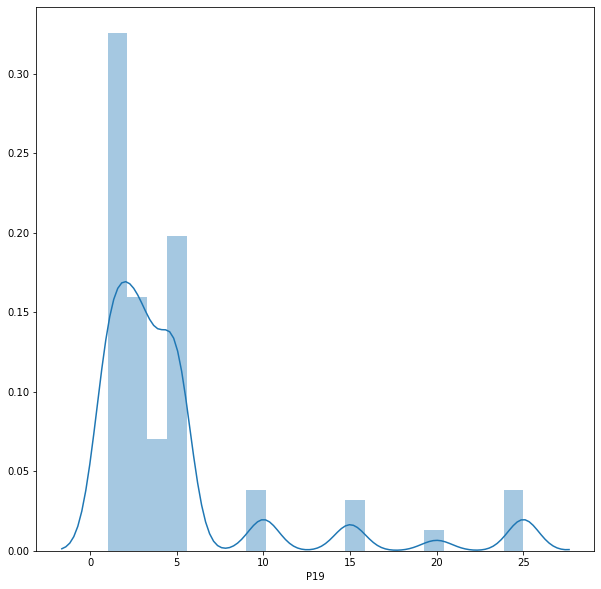

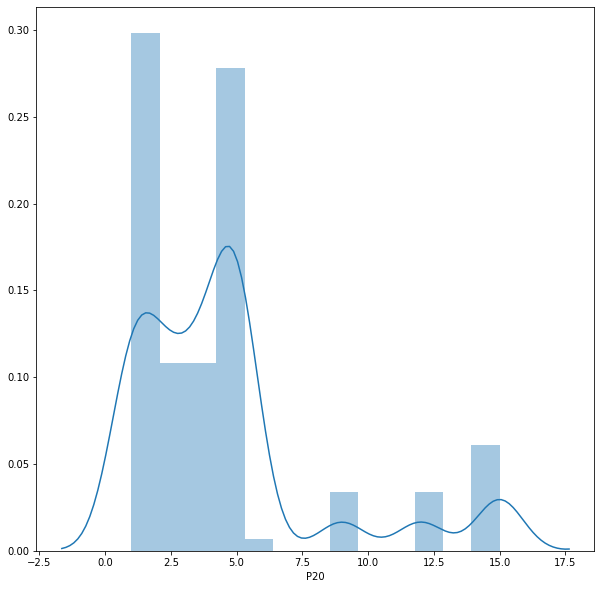

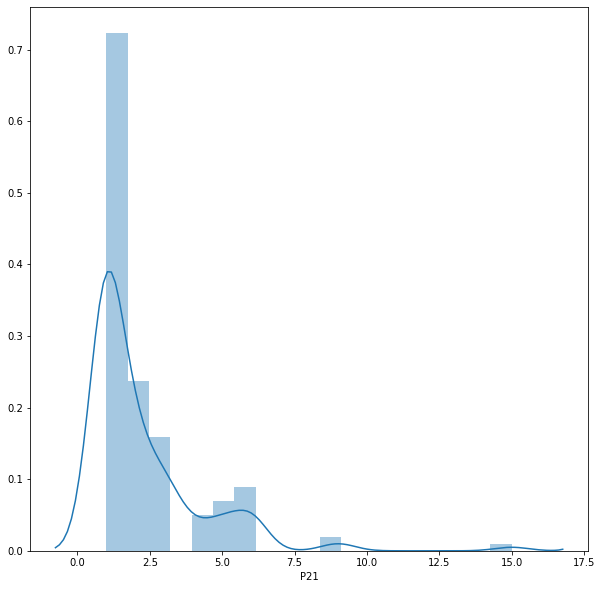

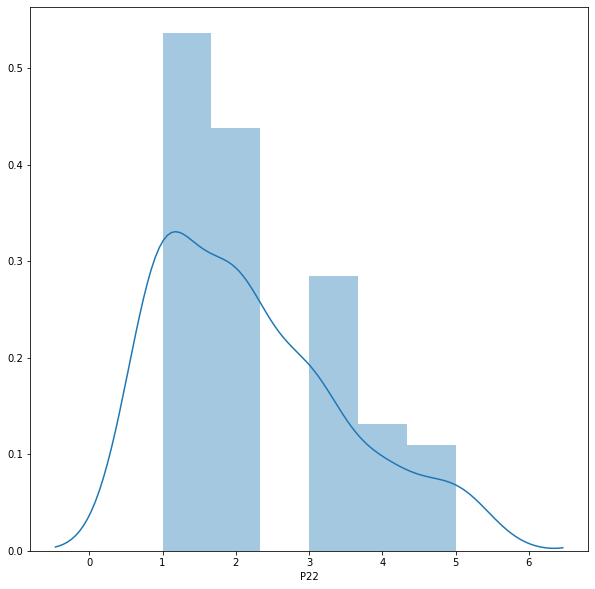

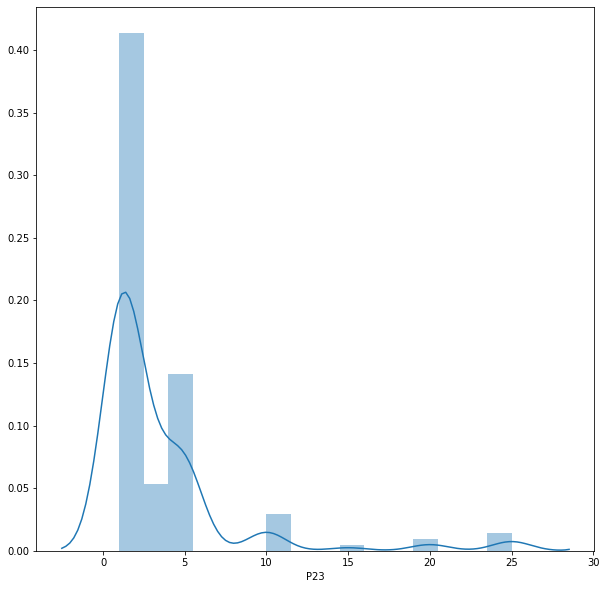

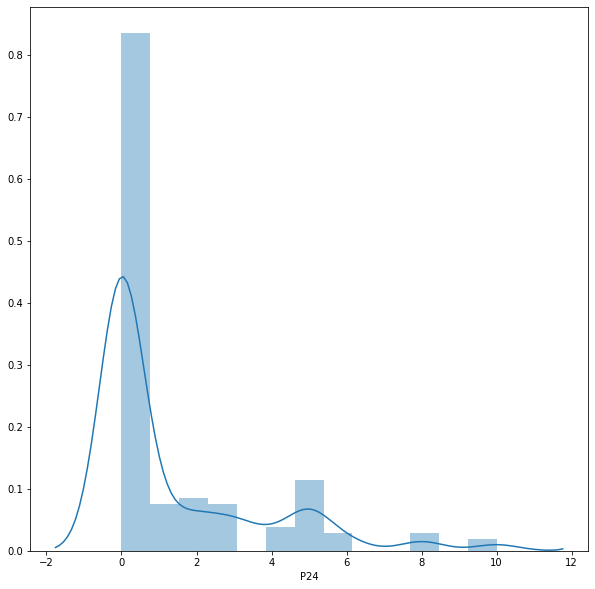

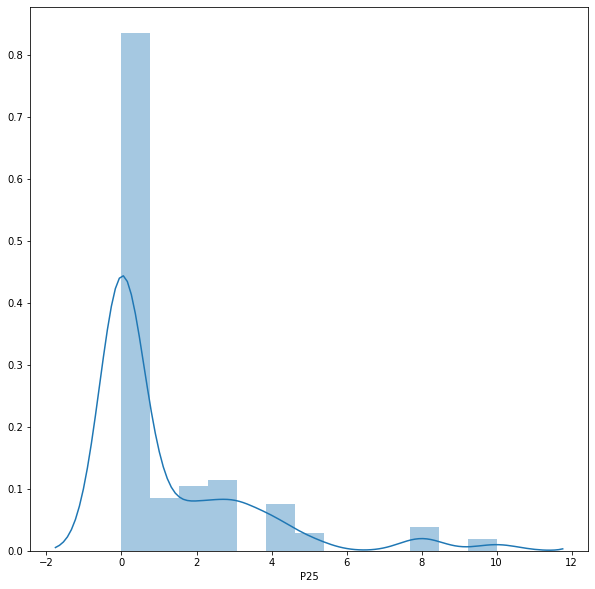

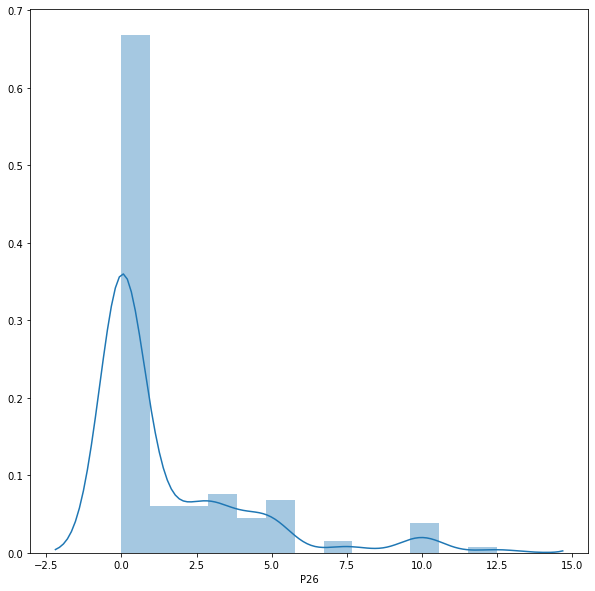

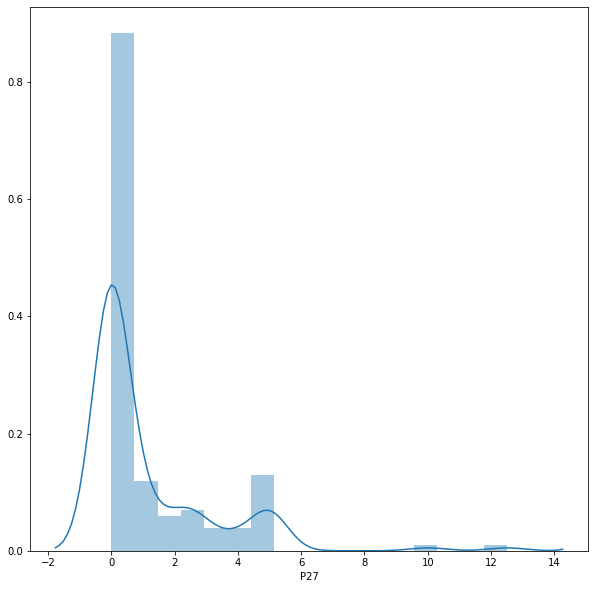

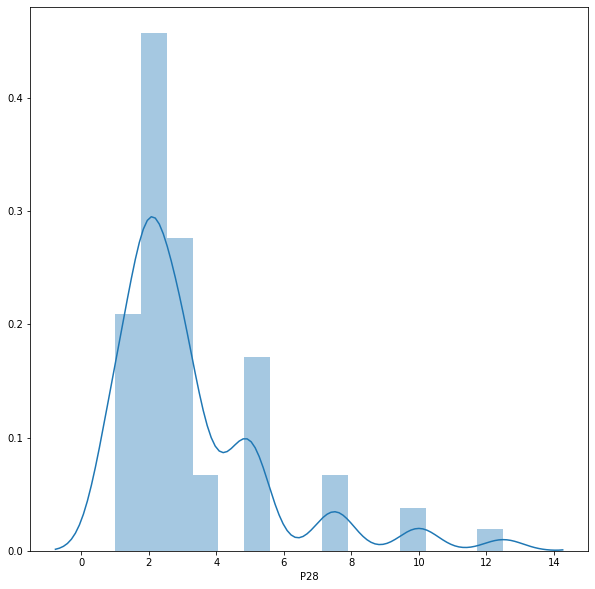

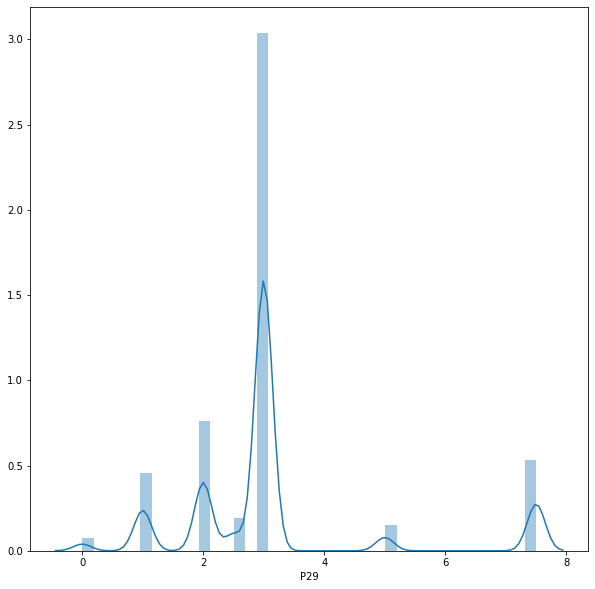

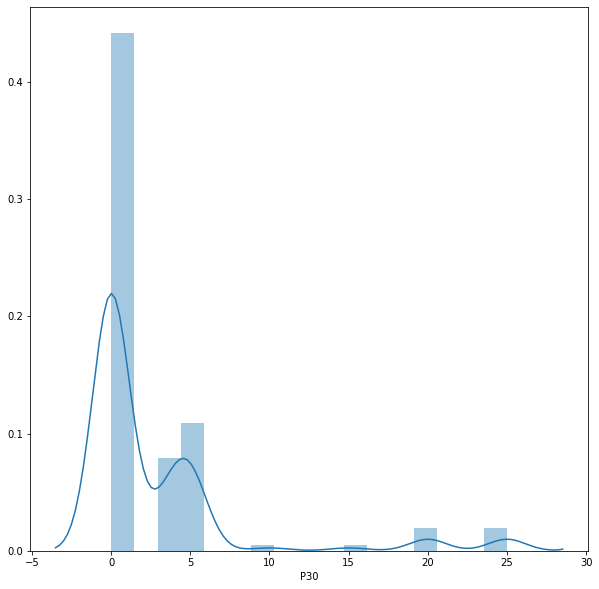

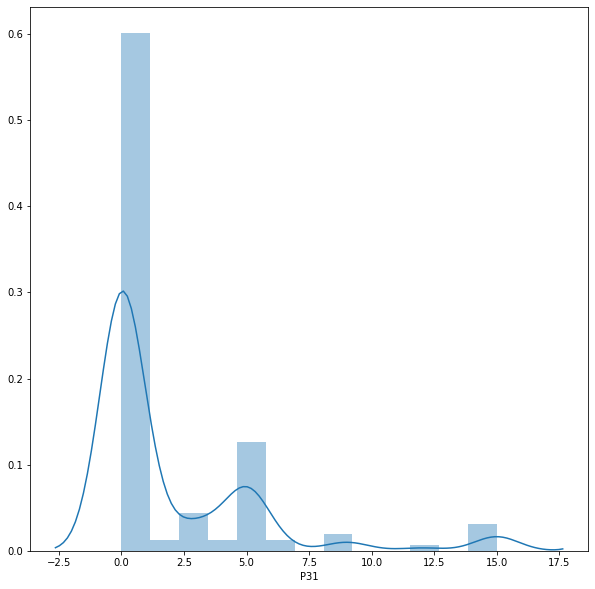

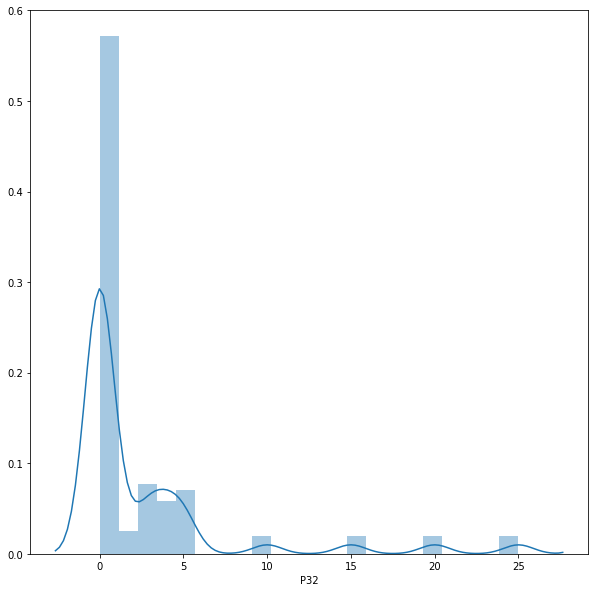

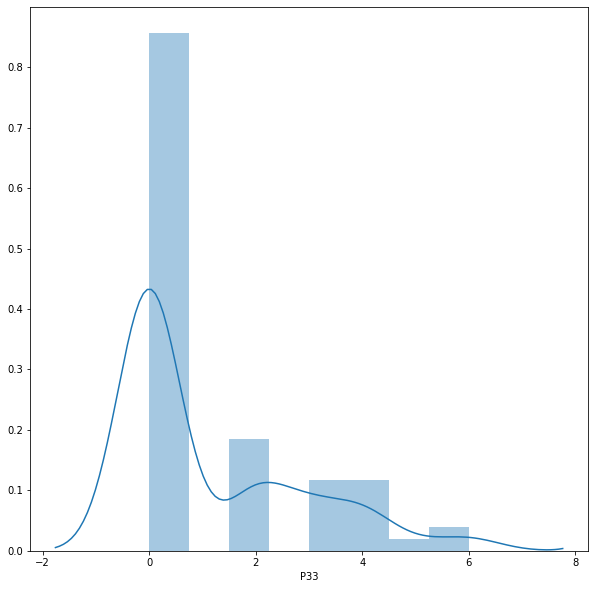

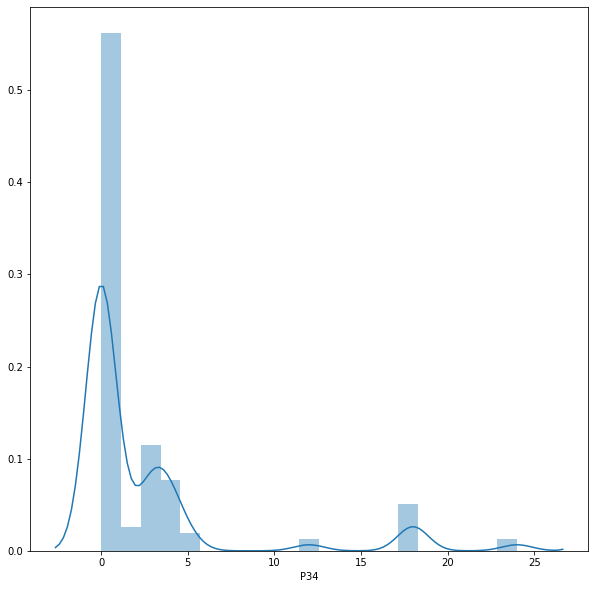

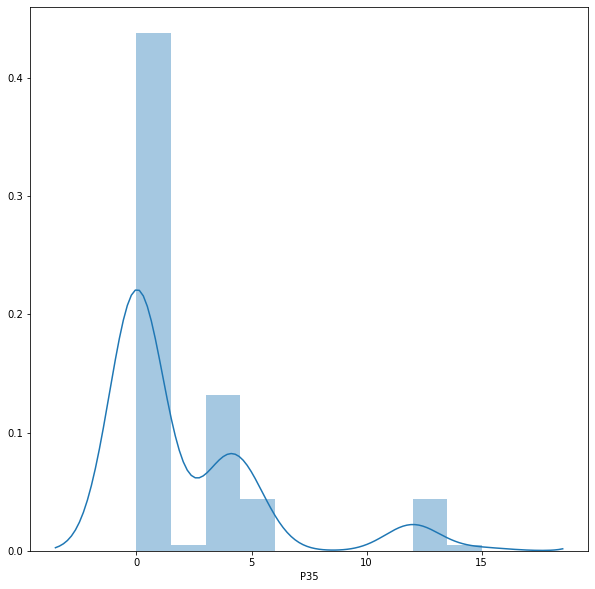

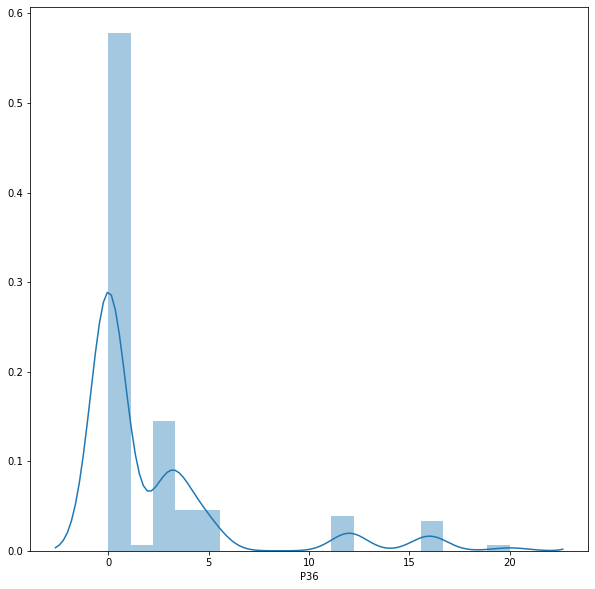

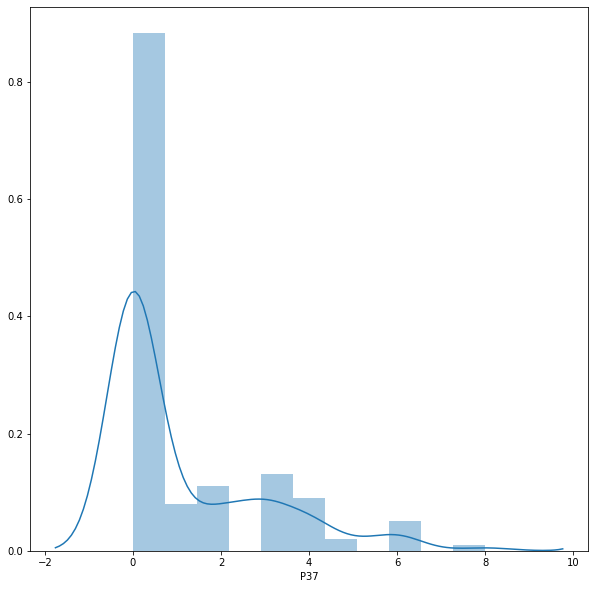

In [23]:
plt.rc('figure', max_open_warning = 0)
for i in range(1,38):
    fig, ax = plt.subplots(1, figsize=(10, 10))
    g1 = sns.distplot(df['P{}'.format(i)], ax=ax, kde=True);
   
    fig.show()

In [24]:
#filtering all the 'P' variables

df.filter([col for col in  df if col.startswith('P')])

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,4,5.0,4.0,4.0,2,2,5,4,5,5,...,2.0,3.0,5,3,4,5,5,4,3,4
1,4,5.0,4.0,4.0,1,2,5,5,5,5,...,3.0,3.0,0,0,0,0,0,0,0,0
2,2,4.0,2.0,5.0,2,3,5,5,5,5,...,1.0,3.0,0,0,0,0,0,0,0,0
3,6,4.5,6.0,6.0,4,4,10,8,10,10,...,2.5,7.5,25,12,10,6,18,12,12,6
4,3,4.0,3.0,4.0,2,2,5,5,5,5,...,1.0,3.0,5,1,3,2,3,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2,3.0,3.0,5.0,4,2,4,4,4,4,...,2.0,3.0,0,0,0,0,0,0,0,0
133,4,5.0,4.0,4.0,2,3,5,4,4,5,...,3.0,3.0,0,0,0,0,0,0,0,0
134,3,4.0,4.0,4.0,2,3,5,5,5,5,...,2.0,3.0,0,0,0,0,0,0,0,0
135,4,5.0,4.0,5.0,2,2,5,5,5,5,...,3.0,3.0,0,0,0,0,0,0,0,0


In [25]:
#sns.pairplot(df.filter([col for col in  df if col.startswith('P')]))

#### Feature Engineering

##### in EDA we have seen our target data 'revenue ' is righ skewed,so we need to normalize the target variable

In [26]:
import scipy.stats as stat
import pylab 


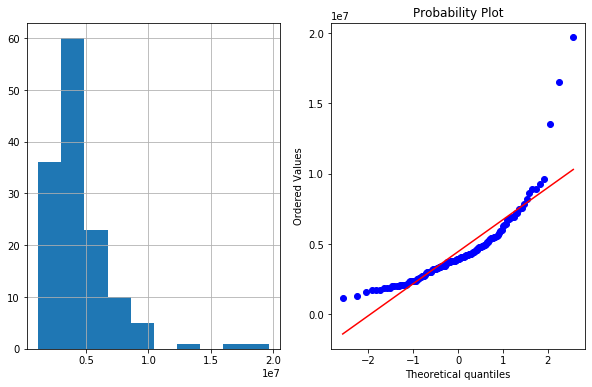

In [27]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
df['revenue'].hist()
plt.subplot(1,2,2)
stat.probplot(df['revenue'],dist='norm',plot=pylab)
plt.show()

In [28]:
import numpy as np
df['revenue_log']=np.log(df['revenue'])


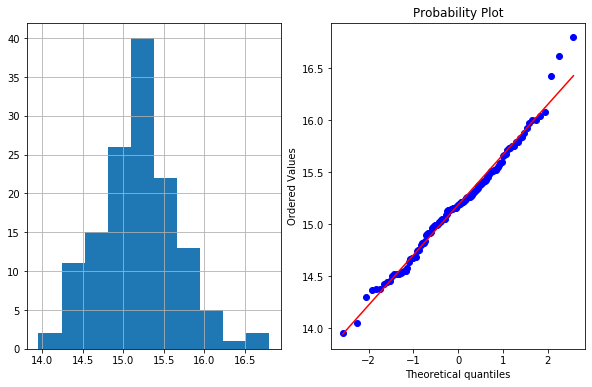

In [29]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
df['revenue_log'].hist()
plt.subplot(1,2,2)
stat.probplot(df['revenue_log'],dist='norm',plot=pylab)
plt.show()

here our target data is right skewed so we did a lognormal transformation on target data 'revenue',
lognormalization is one of the best approch for normalize right and left skewed data

In [30]:
df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,revenue_log
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,5,3,4,5,5,4,3,4,5653753.0,15.547830
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,0,0,0,0,0,0,0,0,6923131.0,15.750379
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,0,0,0,0,0,0,0,0,2055379.0,14.535971
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,25,12,10,6,18,12,12,6,2675511.0,14.799651
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,5,1,3,2,3,4,3,3,4316715.0,15.278005


#### categorical encoding 

In [31]:
df.select_dtypes(include='object')

,Open Date,City,City Group,Type
0,07/17/1999,İstanbul,Big Cities,IL
1,02/14/2008,Ankara,Big Cities,FC
2,03/09/2013,Diyarbakır,Other,IL
3,02/02/2012,Tokat,Other,IL
4,05/09/2009,Gaziantep,Other,IL
...,...,...,...,...
132,06/25/2008,Trabzon,Other,FC
133,10/12/2006,İzmir,Big Cities,FC
134,07/08/2006,Kayseri,Other,FC
135,10/29/2010,İstanbul,Big Cities,FC


In [32]:
# here the feature 'City Group' considered as ordinal data ,so here we apply ordinal encoding through label encoding

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['City Group']=le.fit_transform(df['City Group'])

In [33]:
df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,revenue_log
0,0,07/17/1999,İstanbul,0,IL,4,5.0,4.0,4.0,2,...,5,3,4,5,5,4,3,4,5653753.0,15.547830
1,1,02/14/2008,Ankara,0,FC,4,5.0,4.0,4.0,1,...,0,0,0,0,0,0,0,0,6923131.0,15.750379
2,2,03/09/2013,Diyarbakır,1,IL,2,4.0,2.0,5.0,2,...,0,0,0,0,0,0,0,0,2055379.0,14.535971
3,3,02/02/2012,Tokat,1,IL,6,4.5,6.0,6.0,4,...,25,12,10,6,18,12,12,6,2675511.0,14.799651
4,4,05/09/2009,Gaziantep,1,IL,3,4.0,3.0,4.0,2,...,5,1,3,2,3,4,3,3,4316715.0,15.278005


In [34]:
#'Type' is a nominal data so,we apply one-hot encoding using getdummies
df_dum=pd.get_dummies(df['Type'], drop_first=True)
df_dum

,FC,IL
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
132,1,0
133,1,0
134,1,0
135,1,0


In [35]:
#remove the unwanted features
df.drop(df[['City','Type','Id','Open Date']],axis='columns',inplace=True)

In [36]:
df.head()

,City Group,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,revenue_log
0,0,4,5.0,4.0,4.0,2,2,5,4,5,...,5,3,4,5,5,4,3,4,5653753.0,15.547830
1,0,4,5.0,4.0,4.0,1,2,5,5,5,...,0,0,0,0,0,0,0,0,6923131.0,15.750379
2,1,2,4.0,2.0,5.0,2,3,5,5,5,...,0,0,0,0,0,0,0,0,2055379.0,14.535971
3,1,6,4.5,6.0,6.0,4,4,10,8,10,...,25,12,10,6,18,12,12,6,2675511.0,14.799651
4,1,3,4.0,3.0,4.0,2,2,5,5,5,...,5,1,3,2,3,4,3,3,4316715.0,15.278005


In [37]:
df=pd.concat([df,df_dum],axis='columns')
df.head()

,City Group,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P32,P33,P34,P35,P36,P37,revenue,revenue_log,FC,IL
0,0,4,5.0,4.0,4.0,2,2,5,4,5,...,4,5,5,4,3,4,5653753.0,15.547830,0,1
1,0,4,5.0,4.0,4.0,1,2,5,5,5,...,0,0,0,0,0,0,6923131.0,15.750379,1,0
2,1,2,4.0,2.0,5.0,2,3,5,5,5,...,0,0,0,0,0,0,2055379.0,14.535971,0,1
3,1,6,4.5,6.0,6.0,4,4,10,8,10,...,10,6,18,12,12,6,2675511.0,14.799651,0,1
4,1,3,4.0,3.0,4.0,2,2,5,5,5,...,3,2,3,4,3,3,4316715.0,15.278005,0,1


In [38]:
#remove feature 'revenue',because we alredy have normalized revenue 'revenue_log'
df.drop('revenue',axis='columns',inplace=True)

In [39]:
df.head()

,City Group,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P31,P32,P33,P34,P35,P36,P37,revenue_log,FC,IL
0,0,4,5.0,4.0,4.0,2,2,5,4,5,...,3,4,5,5,4,3,4,15.547830,0,1
1,0,4,5.0,4.0,4.0,1,2,5,5,5,...,0,0,0,0,0,0,0,15.750379,1,0
2,1,2,4.0,2.0,5.0,2,3,5,5,5,...,0,0,0,0,0,0,0,14.535971,0,1
3,1,6,4.5,6.0,6.0,4,4,10,8,10,...,12,10,6,18,12,12,6,14.799651,0,1
4,1,3,4.0,3.0,4.0,2,2,5,5,5,...,1,3,2,3,4,3,3,15.278005,0,1


In [40]:
#dividind data into input(x) and output(y)
x=df.drop('revenue_log',axis=1)

y=df['revenue_log']

##### finding correlation between features

In [41]:
x.corr()

,City Group,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P30,P31,P32,P33,P34,P35,P36,P37,FC,IL
City Group,1.000000,-0.258556,-0.421095,-0.082172,-0.174134,0.019195,-0.416644,-0.193106,-0.071993,-0.018305,...,-0.123097,-0.204542,-0.169750,-0.106115,-0.117024,-0.127973,-0.136617,-0.089976,0.126652,-0.114075
P1,-0.258556,1.000000,0.836671,0.695928,0.677941,0.302820,0.747296,0.853753,0.760820,0.765743,...,0.487589,0.479175,0.552593,0.329795,0.570835,0.449182,0.554951,0.277601,-0.172760,0.188354
P2,-0.421095,0.836671,1.000000,0.473551,0.540322,0.203003,0.673106,0.769842,0.505116,0.481635,...,0.342005,0.353477,0.389376,0.234991,0.394319,0.314798,0.387938,0.161162,-0.127136,0.141087
P3,-0.082172,0.695928,0.473551,1.000000,0.443606,0.168891,0.570486,0.651489,0.689173,0.741967,...,0.473089,0.406701,0.463217,0.312269,0.501575,0.428504,0.484942,0.284065,-0.130387,0.192369
P4,-0.174134,0.677941,0.540322,0.443606,1.000000,0.715406,0.595724,0.700482,0.654594,0.675336,...,0.387747,0.333626,0.440795,0.182820,0.434245,0.277902,0.411664,0.177916,-0.076744,0.067758
P5,0.019195,0.302820,0.203003,0.168891,0.715406,1.000000,0.326524,0.446154,0.447577,0.465662,...,0.244032,0.112603,0.215568,0.071079,0.243040,0.173309,0.193652,0.033548,-0.079878,0.043483
P6,-0.416644,0.747296,0.673106,0.570486,0.595724,0.326524,1.000000,0.738388,0.720144,0.676323,...,0.460618,0.477593,0.519243,0.300611,0.519635,0.413645,0.524552,0.327594,-0.153210,0.142112
P7,-0.193106,0.853753,0.769842,0.651489,0.700482,0.446154,0.738388,1.000000,0.751196,0.775003,...,0.509213,0.452471,0.531011,0.339178,0.562561,0.457721,0.543563,0.309678,-0.161572,0.190290
P8,-0.071993,0.760820,0.505116,0.689173,0.654594,0.447577,0.720144,0.751196,1.000000,0.919956,...,0.454937,0.420425,0.516617,0.256416,0.524474,0.405709,0.499777,0.308294,-0.124121,0.125554
P9,-0.018305,0.765743,0.481635,0.741967,0.675336,0.465662,0.676323,0.775003,0.919956,1.000000,...,0.502670,0.467334,0.544749,0.326869,0.582042,0.467916,0.551953,0.330927,-0.159390,0.163249


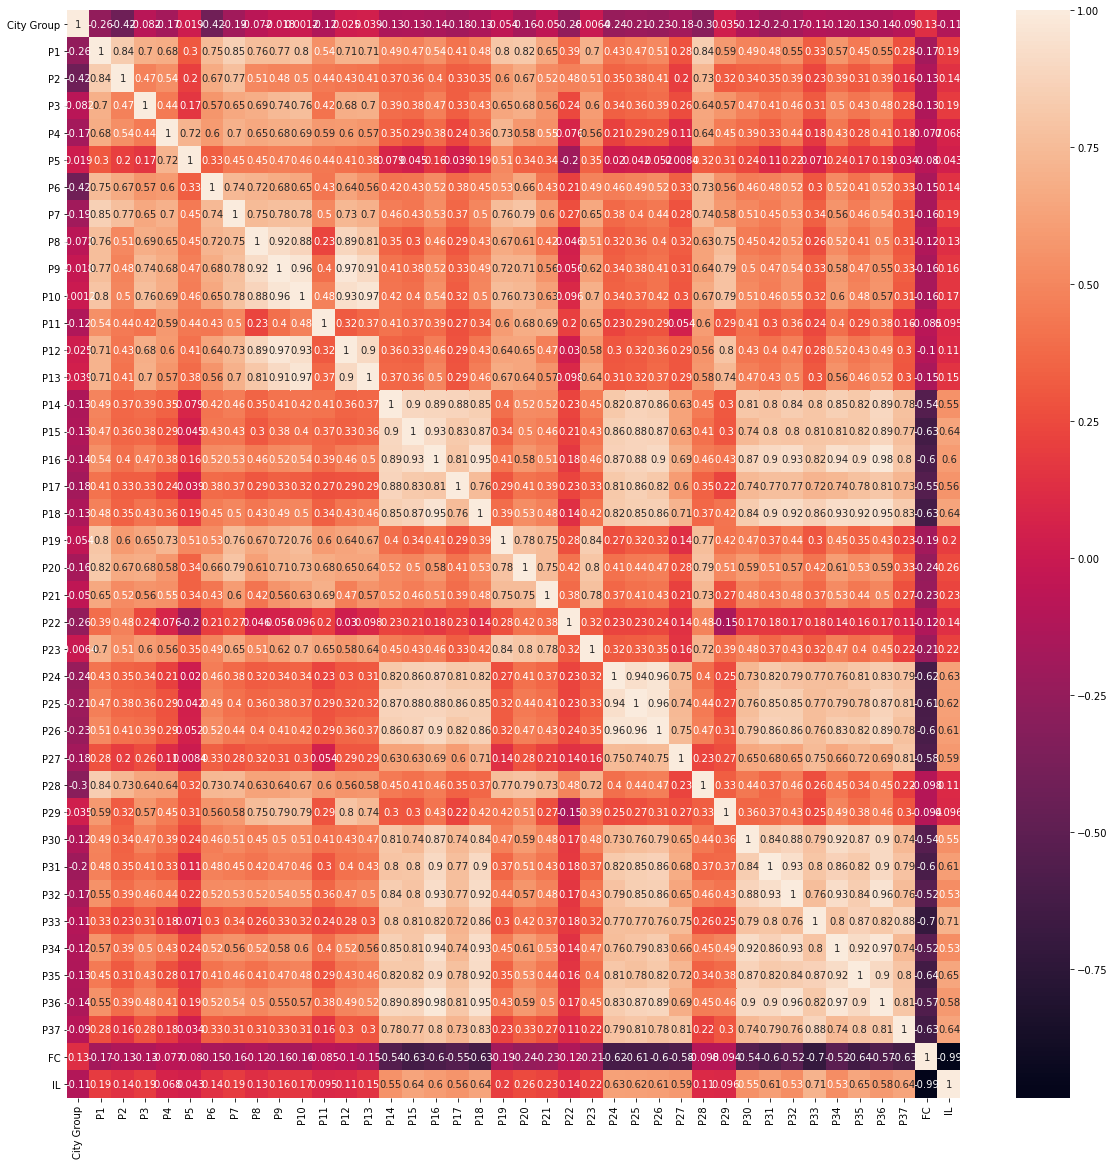

In [42]:
plt.figure(figsize=(20,20))
sns.heatmap(x.corr(),annot=True)

In [43]:
# find and remove correlated features
threshold=0.85
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [44]:
correlation(x,threshold)

{'IL',
 'P10',
 'P12',
 'P13',
 'P15',
 'P16',
 'P17',
 'P18',
 'P24',
 'P25',
 'P26',
 'P30',
 'P31',
 'P32',
 'P33',
 'P34',
 'P35',
 'P36',
 'P37',
 'P7',
 'P9'}

In [45]:
len(correlation(x,threshold))

21

In [46]:
x.drop(x[['IL',
 'P10',
 'P12',
 'P13',
 'P15',
 'P16',
 'P17',
 'P18',
 'P24',
 'P25',
 'P26',
 'P30',
 'P31',
 'P32',
 'P33',
 'P34',
 'P35',
 'P36',
 'P37',
 'P7',
 'P9']],axis='columns',inplace=True)

21 features are highly correlated,then drop them

In [47]:
x

,City Group,P1,P2,P3,P4,P5,P6,P8,P11,P14,P19,P20,P21,P22,P23,P27,P28,P29,FC
0,0,4,5.0,4.0,4.0,2,2,4,3,1,5,4,1,3,3,4.0,2.0,3.0,0
1,0,4,5.0,4.0,4.0,1,2,5,1,0,3,2,1,3,2,0.0,3.0,3.0,1
2,1,2,4.0,2.0,5.0,2,3,5,2,0,1,1,1,1,1,0.0,1.0,3.0,0
3,1,6,4.5,6.0,6.0,4,4,8,8,6,20,12,6,1,10,2.5,2.5,7.5,0
4,1,3,4.0,3.0,4.0,2,2,5,2,2,2,2,1,2,1,5.0,1.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,1,2,3.0,3.0,5.0,4,2,4,4,0,4,3,2,1,1,0.0,2.0,3.0,1
133,0,4,5.0,4.0,4.0,2,3,4,5,0,3,2,2,1,1,0.0,3.0,3.0,1
134,1,3,4.0,4.0,4.0,2,3,5,1,0,2,3,1,2,2,0.0,2.0,3.0,1
135,0,4,5.0,4.0,5.0,2,2,5,2,0,1,1,1,1,1,0.0,3.0,3.0,1


In [48]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y=train_test_split(x,y,test_size=0.25, random_state=42)

## Model fiting using linear regression

In [49]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression().fit(train_X,train_Y)

In [50]:
y_pred=lr.predict(test_X)

In [51]:
lr.score(train_X,train_Y)

0.24830939592564186

In [52]:
lr.score(test_X,test_Y)

-0.24270526273884596

In [53]:
from sklearn import metrics

In [54]:
metrics.r2_score(test_Y,y_pred)

-0.24270526273884596

In [55]:
x1=x

### For getting goog accuracy applying Robustscaler and standardscaler

###### Robestscaler

In [56]:

from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
dfrob_X=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
dfrob_X.head()

,City Group,P1,P2,P3,P4,P5,P6,P8,P11,P14,P19,P20,P21,P22,P23,P27,P28,P29,FC
0,0.0,0.5,0.0,0.0,0.0,0.0,-0.5,-1.0,0.0,0.5,0.666667,0.000000,0.0,0.5,0.25,2.00,-0.25,0.0,-1.0
1,0.0,0.5,0.0,0.0,0.0,-1.0,-0.5,0.0,-1.0,0.0,0.000000,-0.666667,0.0,0.5,0.00,0.00,0.25,0.0,0.0
2,1.0,-0.5,-1.0,-2.0,1.0,0.0,0.0,0.0,-0.5,0.0,-0.666667,-1.000000,0.0,-0.5,-0.25,0.00,-0.75,0.0,-1.0
3,1.0,1.5,-0.5,2.0,2.0,2.0,0.5,3.0,2.5,3.0,5.666667,2.666667,2.5,-0.5,2.00,1.25,0.00,9.0,-1.0
4,1.0,0.0,-1.0,-1.0,0.0,0.0,-0.5,0.0,-0.5,1.0,-0.333333,-0.666667,0.0,0.0,-0.25,2.50,-0.75,0.0,-1.0


In [57]:

train_X,test_X,train_Y,test_Y=train_test_split(dfrob_X,y,test_size=0.25, random_state=42)

In [58]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression().fit(train_X,train_Y)

In [59]:
lr.predict(test_X)

array([14.82125202, 14.86229057, 15.04203682, 15.55106944, 15.13032771,
       15.09603565, 15.05861123, 14.78780283, 15.38465589, 15.16106223,
       15.11112615, 14.06657409, 15.21216123, 15.47887115, 15.30828777,
       15.35233596, 15.38009635, 15.20706382, 15.15094343, 15.2175684 ,
       15.21897016, 14.9810686 , 15.22738331, 15.12262285, 15.15483965,
       15.34340305, 15.0417964 , 15.05655663, 15.37353494, 15.14202253,
       14.95585521, 15.18206246, 15.24311375, 15.00883929, 15.27379851])

In [60]:
lr.score(train_X,train_Y)

0.2483093959256415

In [61]:
lr.score(test_X,test_Y)

-0.24270526273884774

##### StandardScaler

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler=StandardScaler()
### fit vs fit_transform
df_scaled=scaler.fit_transform(x1)

In [64]:
df_scaled

array([[-0.86971849, -0.00503441,  0.39171594, ..., -0.531493  ,
        -0.08063127, -1.11619964],
       [-0.86971849, -0.00503441,  0.39171594, ..., -0.09677932,
        -0.08063127,  0.89589708],
       [ 1.14979733, -0.69474921, -0.27081596, ..., -0.96620668,
        -0.08063127, -1.11619964],
       ...,
       [ 1.14979733, -0.34989181, -0.27081596, ..., -0.531493  ,
        -0.08063127,  0.89589708],
       [-0.86971849, -0.00503441,  0.39171594, ..., -0.09677932,
        -0.08063127,  0.89589708],
       [-0.86971849, -0.00503441,  0.39171594, ..., -0.09677932,
        -0.08063127,  0.89589708]])

In [65]:
dfstd_X=pd.DataFrame(df_scaled,columns=x1.columns)
dfstd_X.head()

,City Group,P1,P2,P3,P4,P5,P6,P8,P11,P14,P19,P20,P21,P22,P23,P27,P28,P29,FC
0,-0.869718,-0.005034,0.391716,-0.308701,-0.367578,-0.006056,-0.638471,-0.622801,-0.138027,-0.152985,0.016993,-0.148179,-0.621025,0.630997,-0.093190,1.385793,-0.531493,-0.080631,-1.116200
1,-0.869718,-0.005034,0.391716,-0.308701,-0.367578,-0.835796,-0.638471,-0.082777,-1.188569,-0.520686,-0.341174,-0.689527,-0.621025,0.630997,-0.313312,-0.556444,-0.096779,-0.080631,0.895897
2,1.149797,-0.694749,-0.270816,-2.253162,0.619837,-0.006056,-0.168199,-0.082777,-0.663298,-0.520686,-0.699342,-0.960201,-0.621025,-1.000071,-0.533434,-0.556444,-0.966207,-0.080631,-1.116200
3,1.149797,0.684680,0.060450,1.635760,1.607252,1.653422,0.302072,1.537293,2.488326,1.685519,2.703252,2.017212,1.823814,-1.000071,1.447663,0.657454,-0.314136,2.606351,-1.116200
4,1.149797,-0.349892,-0.270816,-1.280931,-0.367578,-0.006056,-0.638471,-0.082777,-0.663298,0.214716,-0.520258,-0.689527,-0.621025,-0.184537,-0.533434,1.871352,-0.966207,-0.080631,-1.116200


In [66]:

train_X,test_X,train_Y,test_Y=train_test_split(dfstd_X,y,test_size=0.25, random_state=42)

In [67]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression().fit(train_X,train_Y)

In [68]:
lr.score(train_X,train_Y)

0.24830939592564186

In [69]:
lr.score(test_X,test_Y)

-0.24270526273884727

In [70]:
pred_Y=lr.predict(test_X)


In [71]:
test_Y.head()

105    14.842280
104    15.312391
12     14.366307
26     14.634155
123    15.265631
Name: revenue_log, dtype: float64

In [85]:
final=pd.DataFrame(pred_Y,test_Y,columns=[['predicted']])

In [86]:
final.head()

,predicted
revenue_log,
14.842280,14.821252
15.312391,14.862291
14.366307,15.042037
14.634155,15.551069
15.265631,15.130328


In [74]:
pred_Y

array([14.82125202, 14.86229057, 15.04203682, 15.55106944, 15.13032771,
       15.09603565, 15.05861123, 14.78780283, 15.38465589, 15.16106223,
       15.11112615, 14.06657409, 15.21216123, 15.47887115, 15.30828777,
       15.35233596, 15.38009635, 15.20706382, 15.15094343, 15.2175684 ,
       15.21897016, 14.9810686 , 15.22738331, 15.12262285, 15.15483965,
       15.34340305, 15.0417964 , 15.05655663, 15.37353494, 15.14202253,
       14.95585521, 15.18206246, 15.24311375, 15.00883929, 15.27379851])

finally we understad accuracy of the model in higher in the case of applying StandardScaler compared with RobustScaler

In [92]:
df=pd.read_csv('train.csv')

In [102]:
#sumbissionn=lr.predict(x)
submission=pd.DataFrame(lr.predict(x),columns=['prediction'])
submission

,prediction
0,14.704255
1,14.944892
2,14.172317
3,14.791676
4,14.054328
...,...
132,14.579228
133,14.878836
134,14.116532
135,14.704832


In [103]:
submission=pd.concat([df.Id,submission],axis='columns')

In [104]:
submission

,Id,prediction
0,0,14.704255
1,1,14.944892
2,2,14.172317
3,3,14.791676
4,4,14.054328
...,...,...
132,132,14.579228
133,133,14.878836
134,134,14.116532
135,135,14.704832


In [105]:
submission.to_csv('submission.csv', index=False)

In [106]:
pd.read_csv('submission.csv')

,Id,prediction
0,0,14.704255
1,1,14.944892
2,2,14.172317
3,3,14.791676
4,4,14.054328
...,...,...
132,132,14.579228
133,133,14.878836
134,134,14.116532
135,135,14.704832
